# Describe: 

-Our data comes from the Edinburgh Festival API provided by Data Host, it contains all the festival information of Edinburgh Festival from 2012 to 2020, among which we mainly analyze the data of Fringe Festival from 2015 to 2019. Our data host hopes that we can find or predict which festival or event will become popular in the future.

The process of getting the data from the API is not shown, please contact me if you need.

○ what is the general type of the data (tabular, network, geographical, textual etc.)

-The format of the data is JSON, which is mainly hierarchical data, but it also includes latitude and longitude, which I think is also a form of geographic data.

○ how large and complex is it (rows/columns, size, variation, structure) 

-There are 4,257 pieces of data from 2019, 3,985 pieces of data from 2018, and 3,795 pieces of data from 2017, each of which represents an event.Each CSV file is larger than 23M

○ What fields and data types are present (max/min, levels for categorical values).

-Each event has 34 keys, most of which are string, float, bool, int, etc., which can be analyzed, some keys are null, and some are nested with dict and list. The maximum and minimum number of performers can be counted, genre, artist type and age limit can be classified

○ Links between this data and other data (e.g. foreign keys, unique ids) 

-There is no links between festivals, but in our subsequent analysis, we will use Festival-code as the foreign key to connect festivals and their nested lists and dict

In [1]:
# import sys # never mind these two commands.
import pandas as pd
import numpy as np
import csv
import json
import seaborn as sns     
import matplotlib.pyplot as plt
%matplotlib inline

fringe_2019 = pd.read_csv("fringe_2019.csv")
fringe_2018 = pd.read_csv("fringe_2018.csv")
fringe_2017 = pd.read_csv("fringe_2017.csv")
fringe_2016 = pd.read_csv("fringe_2016.csv")
fringe_2015 = pd.read_csv("fringe_2015.csv")
fringe_2019.describe()

,sub_venue,year,fringe_first,performers_number,sub_title,description_teaser,longitude,non_english,latitude
count,0.0,4257.0,0.0,4257.000000,0.0,0.0,4257.000000,0.0,4257.000000
mean,NaN,2019.0,NaN,4.807846,NaN,NaN,-3.189240,NaN,55.948427
std,NaN,0.0,NaN,8.845754,NaN,NaN,0.012095,NaN,0.007872
min,NaN,2019.0,NaN,1.000000,NaN,NaN,-3.381604,NaN,55.608425
25%,NaN,2019.0,NaN,1.000000,NaN,NaN,-3.192293,NaN,55.945854
50%,NaN,2019.0,NaN,2.000000,NaN,NaN,-3.187818,NaN,55.948156
75%,NaN,2019.0,NaN,5.000000,NaN,NaN,-3.185542,NaN,55.950167
max,NaN,2019.0,NaN,200.000000,NaN,NaN,-2.990308,NaN,55.980849


    Let's take fringe_2019 as an example to talk about the data. 

First of all, ‘sub_venue’，‘fringe_first’，‘sub_title’，‘description_teaser’ ，‘non_english’are all NaN, which will not be analyzed.

Then, count is 4257 values, demonstrating that year, Performers Number, Longtitude, latitude are no NaN value

And finally, API Document says：‘ Where no value is available, the API will return null values - you should ensure your application treats and displays these values as "Unknown" rather than for example as equivalent to a boolean false or numerical zero’. So if there's null values later on, I'm going to fill it with 'unknown'.

* In columns disabled, update_times, discounts, performance_space, categories, and venue, the data in each row has changed into dictionary datatype.
- In column performances, the data in each row has changed into list datatype, and in each list, each item is in dictionary datatype.

In [2]:

def preprocess(df):
    disabled = []
    update = []
    discounts = []
    space = []
    categories = []
    venue = []
    performances = []
    for i in range(0, len(df)):
        disabled.append(eval(df['disabled'][i]))
        update.append(eval(df['update_times'][i]))
        discounts.append(eval(df['discounts'][i]))
        space.append(eval(df['performance_space'][i]))
        categories.append(eval(df['categories'][i]))
        venue.append(eval(df['venue'][i]))
        performances.append(list(eval(df['performances'][i])))
    df['disabled'] = disabled
    df['update_times'] = update
    df['discounts'] = discounts
    df['performance_space'] = space
    df['categories'] = categories
    df['venue'] = venue
    df['performances'] = performances
    return

preprocess(fringe_2019)
preprocess(fringe_2018)
preprocess(fringe_2017)

Write 2019‘s DISCOUNTS in dict format into CSV file for convenient data processing later

I use 'festival_code' as foreign key, in order to do the follow-up analysis, I can better map to the specific festival

In [3]:

disc_list = fringe_2019['discounts'].tolist()
disc=disc_list 
with open('disc_fringe_2019.csv','w',newline='',encoding='utf-8')as f:
    disc_fieldnames = list(disc[0].keys())
    # use 'festival_code' as foreign key
    disc_fieldnames.append('festival_code')
    
    writer = csv.DictWriter(f,fieldnames=disc_fieldnames)
    writer.writeheader()
    for i in range(0, len(disc)):
        temp = disc[i]
        temp['festival_code'] = fringe_2019['code'][i]
        writer.writerow(temp)

Write 2017‘s，2018's and 2019‘s DISCOUNTS in dict format into CSV file for convenient data processing later

I use 'festival_code' as foreign key，In the last for cycle, ‘code’ of the three years should be metched with their discounts, so that each can be a good fit

In [4]:

disc_list2= fringe_2017['discounts'].tolist()
disc_list1= fringe_2018['discounts'].tolist()
disc_list = fringe_2019['discounts'].tolist()
disc=disc_list + disc_list1+ disc_list2
with open('disc_fringe.csv','w',newline='',encoding='utf-8')as f:
    disc_fieldnames1 = list(disc[0].keys())
    # use 'festival_code' as foreign key
    disc_fieldnames1.append('festival_code')
    
    writer = csv.DictWriter(f,fieldnames=disc_fieldnames1)
    writer.writeheader()
    #Match foreign keys with discounts
    for i in range(0, len(disc)):
        temp = disc[i]
        if(i<len(disc_list)):
            temp['festival_code'] = fringe_2019['code'][i]
        elif(i<(len(disc_list1)+len(disc_list))) :
            temp['festival_code'] =(fringe_2018['code'][i-len(disc_list)]) 
        elif(i>(len(disc_list1)+len(disc_list))) :
            temp['festival_code'] =(fringe_2017['code'][i-len(disc_list)-len(disc_list1)])
        writer.writerow(temp)

Since there is no value in comparing the changes of discount from year to year, I plan to analyse which kind of discount is more attractive to tourists. 

I take the discount of 2019 as an example to conduct data analysis: 

Firstly, it can be seen from code that there are 4257 festivals, but 'two for one', 'Group', 'friends' only have 3516 lines, thus it is concluded that they have null value; 

secondly, from the unique=1 of' School 'and' Passport ', ' School 'and' Passport ' only have flase.

In [5]:
disc_fringe_2019 = pd.read_csv("disc_fringe_2019.csv")
disc_fringe_2019.describe()

,two_for_one,group,friends,passport,schools,festival_code
count,3516,3516,3516,4257,4257,4257
unique,2,2,2,1,1,4257
top,False,True,True,False,False,2019MARKWAT_ST
freq,1776,2533,2367,4257,4257,1


Data cleansing: Fills null with UNKNOWN

The data cleaning process is divided into three steps. 

The first step is to figure out how many null; 

the second step is to figure out the proportion of null, and estimate what causes the missing（I tentatively propose that they are data that exists but is not recorded）. 

Finally, fill in unknown according to the document （Document says ：Where no value is available, the API will return null values - you should ensure your application treats and displays these values as "Unknown" rather than for example as equivalent to a boolean false or numerical zero）

In [6]:
null1=disc_fringe_2019.isnull().sum()#Count the total null values for each column
percent = null1.sum()/np.product(disc_fringe_2019.shape)#figure out the proportions

def fillnull(df):
    df=df.fillna('Unknown')
    return df

disc_fringe_2019=fillnull(disc_fringe_2019)

There is a pie method to analyze the distribution of several discount methods
Method to calculate the proportion of true, flase, unknown for the disc_fringe_2019's columns

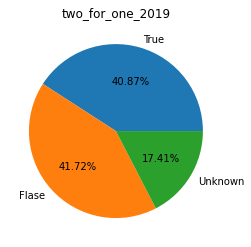

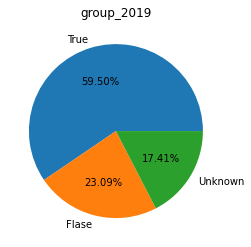

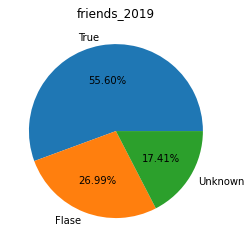

done
done
done


In [7]:
def pie(df):
    for i in df.columns:
        if i=='festival_code'or i=='schools'or i=='passport':
            print('done')
        else:
            n1=(df[i]==True).sum()
            n2=(df[i]==False).sum()
            n3=(df[i]=="Unknown").sum()
            share1=n1/(n1+n2+n3)
            share2=n2/(n1+n2+n3)
            share3=n3/(n1+n2+n3)
            share=[share1,share2,share3]
            fLabels=["True","Flase","Unknown"]
            plt.pie(share, labels = fLabels,autopct='%1.2f%%')
            plt.title(i+'_2019')
            plt.show()
    return
pie(disc_fringe_2019)

It can be observed from the above figure that false is orange, true is blue, unknown is green. In the pie charts of 'Group' and 'Friends', most artists choose these preferential methods, but in'Twoforone' chart,more artists reject such discount, at the same time,' schools' and 'Passport' are not selected(since they are all false).

As can be seen from the above figure, we only need to discuss in the three elements of "twoforone", "group" and "friends"
 we will discuss the distribution of three discount modes: DF1 is only '2FOR1', DF2 is  '2For1' and 'group', DF3 is '2For1' and 'friends', DF4 is '2for1''friend'and' group ', DF5 is only 'group', DF6 is' group 'and' friends', and DF7 is only 'friends'

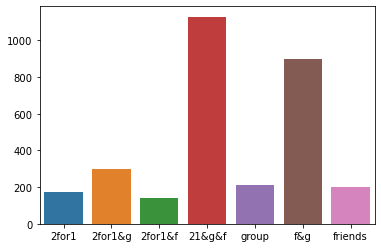

In [8]:

df1=disc_fringe_2019[(disc_fringe_2019['two_for_one']==True)&(disc_fringe_2019['group']!=True)&(disc_fringe_2019['friends']!=True)]#1only
df2=disc_fringe_2019[(disc_fringe_2019['two_for_one']==True)&(disc_fringe_2019['group']==True)&(disc_fringe_2019['friends']!=True)]#12
df3=disc_fringe_2019[(disc_fringe_2019['two_for_one']==True)&(disc_fringe_2019['group']!=True)&(disc_fringe_2019['friends']==True)]#13
df4=disc_fringe_2019[(disc_fringe_2019['two_for_one']==True)&(disc_fringe_2019['group']==True)&(disc_fringe_2019['friends']==True)]#123
df5=disc_fringe_2019[(disc_fringe_2019['two_for_one']!=True)&(disc_fringe_2019['group']==True)&(disc_fringe_2019['friends']!=True)]#2only
df6=disc_fringe_2019[(disc_fringe_2019['two_for_one']!=True)&(disc_fringe_2019['group']==True)&(disc_fringe_2019['friends']==True)]#23
df7=disc_fringe_2019[(disc_fringe_2019['two_for_one']!=True)&(disc_fringe_2019['group']!=True)&(disc_fringe_2019['friends']==True)]#3only

x = ["2for1",'2for1&g','2for1&f','21&g&f','group','f&g','friends']
y = [df1.shape[0], df2.shape[0], df3.shape[0], df4.shape[0],df5.shape[0],df6.shape[0],df7.shape[0]]
sns.barplot(x,y)

As can be seen from the above figure, there are still a large number of artists willing to choose a variety of preferential methods, among which the number of artists who choose all three methods is the largest（more than 1000）,fewer artists choose '2FOR1' and '2For1 & Friends'

Next, I will analyze the number of performers. I think the situation of performers may be related to the audience's preference, or it may be related to the situation of the festival every year

Data cleansing 
1. Determine if there some data is  null  -  none
2. Determine whether the number of people are integers - > are all int

In [9]:
#cleaning
null2=fringe_2019["performers_number"].isnull().sum()
null3=fringe_2018["performers_number"].isnull().sum()
null4=fringe_2017["performers_number"].isnull().sum()#Count the total null values for each column
print(null2,null3,null4)#all 0.There is no need to fill in null

print(pd.DataFrame(fringe_2019['performers_number']).info(),
      pd.DataFrame(fringe_2018['performers_number']).info(),
      pd.DataFrame(fringe_2017['performers_number']).info())# all int


0 0 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4257 entries, 0 to 4256
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   performers_number  4257 non-null   int64
dtypes: int64(1)
memory usage: 33.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   performers_number  3985 non-null   int64
dtypes: int64(1)
memory usage: 31.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3795 entries, 0 to 3794
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   performers_number  3795 non-null   int64
dtypes: int64(1)
memory usage: 29.8 KB
None None None


Merge the year and performers_number from the three years into a single table
1. Select 3years‘ ’year‘ and ’code‘, ‘performers_number’ and ‘code’
2. Combine year and performers_number with code as index
3. Merge the three years' dataframes with the column name（‘year’ and‘num’） again

In [10]:
ndf1=pd.DataFrame({'year':fringe_2019["year"],'code':fringe_2019["code"]})
ndf2=pd.DataFrame({'year':fringe_2018["year"],'code':fringe_2018["code"]})
ndf3=pd.DataFrame({'year':fringe_2017["year"],'code':fringe_2017["code"]})
ndf4=pd.DataFrame({'num':fringe_2019["performers_number"],'code':fringe_2019["code"]})
ndf5=pd.DataFrame({'num':fringe_2018["performers_number"],'code':fringe_2018["code"]})
ndf6=pd.DataFrame({'num':fringe_2017["performers_number"],'code':fringe_2017["code"]})
result1=pd.merge(ndf1,ndf4,on='code')
result2=pd.merge(ndf2,ndf5,on='code')
result3=pd.merge(ndf3,ndf6,on='code')
result=result1.append([result2,result3])

cleaning 3.Determine whether the number of years and the number of people are all positive--all positive

In [11]:
def pnn(df):
    positiveNum=0
    negativeNum=0
    nonePositiveNegative=0
    for i in df:
        if i>0:
            positiveNum=positiveNum+1
        elif i<0:
            negativeNum=negativeNum+1
        else:
            nonePositiveNegative=nonePositiveNegative+1
    print (" positve："+str(positiveNum))
    print (" negative："+str(negativeNum))
    print (" nonePN："+str(nonePositiveNegative))
    return
pnn(ndf1['year'])
pnn(ndf2['year'])
pnn(ndf3['year'])
pnn(ndf4['num'])
pnn(ndf5['num'])
pnn(ndf6['num'])
#in conclusion，all positive

 positve：4257
 negative：0
 nonePN：0
 positve：3985
 negative：0
 nonePN：0
 positve：3795
 negative：0
 nonePN：0
 positve：4257
 negative：0
 nonePN：0
 positve：3985
 negative：0
 nonePN：0
 positve：3795
 negative：0
 nonePN：0


knowing the number of performers over 3 years to see their median, maximum, minimum, average,standard deviation, etc

In [12]:
result1.describe()

,year,num
count,4257.0,4257.000000
mean,2019.0,4.807846
std,0.0,8.845754
min,2019.0,1.000000
25%,2019.0,1.000000
50%,2019.0,2.000000
75%,2019.0,5.000000
max,2019.0,200.000000


In [13]:
result2.describe()

,year,num
count,3985.0,3985.000000
mean,2018.0,5.262735
std,0.0,13.516165
min,2018.0,1.000000
25%,2018.0,1.000000
50%,2018.0,2.000000
75%,2018.0,5.000000
max,2018.0,500.000000


In [14]:
result3.describe()

,year,num
count,3795.0,3795.000000
mean,2017.0,6.067194
std,0.0,14.050176
min,2017.0,1.000000
25%,2017.0,1.000000
50%,2017.0,2.000000
75%,2017.0,6.000000
max,2017.0,300.000000


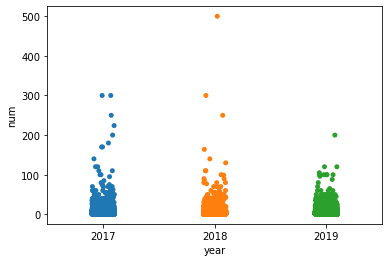

In [15]:
sns.stripplot(x=result["year"],y=result["num"])
plt.show()

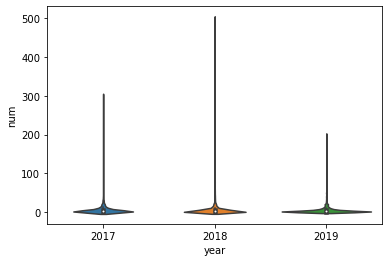

In [16]:
sns.violinplot(x=result["year"],y=result["num"])
plt.show()

Combining two visualizations and three describes (), we can conclude that the average in 2019 is 4.8, and the maximum in 200, in 2018 is 5.3, and the maximum in 500, in 2017 is 6.1, and the maximum in 300. The maximum number of performers can be seen in stripplot and Violinplot, while the majority of performers are concentrated below 10, which can also be obtained by combining with the average.

From Violinplot, it can be seen that the violins of 2019 are the widest. Combined with the minimum standard deviation of 2019, we conclude that 2019 has the most small-scale performers

Since three years of data cannot determine the trend, I chose five years of data to calculate their maximum, minimum, average and total. And try to get a relationship between them and the year

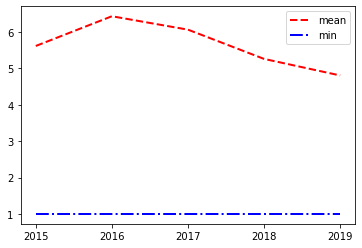

In [17]:
def per_num_mean(df):
    mean=df["performers_number"].mean()
    return mean
mean1=per_num_mean(fringe_2019)
mean2=per_num_mean(fringe_2018)
mean3=per_num_mean(fringe_2017)
mean4=per_num_mean(fringe_2016)
mean5=per_num_mean(fringe_2015)
x_data = ['2015','2016','2017','2018','2019']
y_data = [mean5,mean4,mean3,mean2,mean1]

def per_num_min(df):
    min=df["performers_number"].min()
    return min
min1=per_num_min(fringe_2019)
min2=per_num_min(fringe_2018)
min3=per_num_min(fringe_2017)
min4=per_num_min(fringe_2016)
min5=per_num_min(fringe_2015)
y_data2 = [min5,min4,min3,min2,min1]

def per_num_max(df):
    max=df["performers_number"].max()
    return max
max1=per_num_max(fringe_2019)
max2=per_num_max(fringe_2018)
max3=per_num_max(fringe_2017)
max4=per_num_max(fringe_2016)
max5=per_num_max(fringe_2015)
y_data3 = [max5,max4,max3,max2,max1]

def per_num_sum(df):
    sum=df["performers_number"].sum()
    return sum
sum1=per_num_sum(fringe_2019)
sum2=per_num_sum(fringe_2018)
sum3=per_num_sum(fringe_2017)
sum4=per_num_sum(fringe_2016)
sum5=per_num_sum(fringe_2015)
y_data4 = [sum5,sum4,sum3,sum2,sum1]

ln1,=plt.plot(x_data,y_data,color='red',linewidth=2.0,linestyle='--')
ln2,=plt.plot(x_data,y_data2,color='blue',linewidth=2.0,linestyle='-.')

plt.legend(handles=[ln1,ln2],labels=['mean','min'])

In conclusion, the minimum is all 1, but the average decreases from 2016 onwards

Text(0.5, 1.0, 'performers_number_sums')

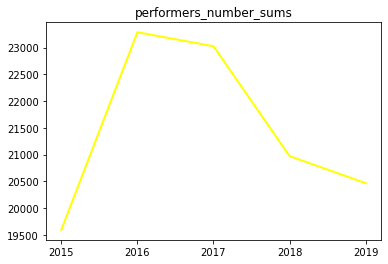

In [18]:
ln4,=plt.plot(x_data,y_data4,color='yellow',linewidth=2.0,linestyle='solid')
plt.title("performers_number_sums") 

The total number of performers surged from 2015 to 2016, but gradually declined after 2016, with 2019 dropping by around 3,000 compared with 2016

Text(0.5, 1.0, 'performers_number_maxs')

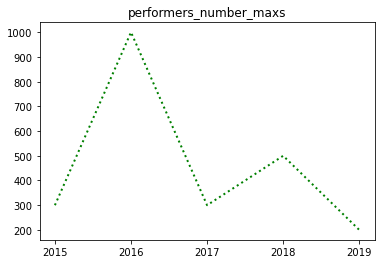

In [19]:
ln3,=plt.plot(x_data,y_data3,color='green',linewidth=2.0,linestyle=':')
plt.title("performers_number_maxs") 

The peak was as high as 1,000 in 2016, but dropped to 200 after 2019, and fluctuated from 2016 to 2019

In my opinion, the number of performers is related to the year. Generally speaking, 2016 is the peak year for fringe performers, with the number declining year by year from 17 to 19. Combined with the violinpolt above, performers are more likely to organize smaller performances, and the number of large-scale performances is also declining.

# Reflect and Hypothesise:

What do you think might be behind the relationships and distributions that you have found? How does your data relate to the world?In short, what hypotheses came up as you explored the data, and how would you go about testing them? We would expect to see: 

○ A 200 word reflection on the data

○ 3-5 hypotheses with an explanation of: 
■ What your hypothesis is 
■ why you think that (referring to your graphs) 
■ How you could go about testing it (note that this may include: further studies, asking the data owner, using some advanced algorithms, checking each data point individually, etc..) 

NOTE: You don’t have to actually test the hypotheses - you just have to demonstrate that you have plausibly thought about how you would test them.

#reflection：

First, reflecting on the difficulties I met, our data host hopes that we can find or predict which festivals will become popular in the future. It is easy for me to think that tickets with big discounts are more likely to attract tourists, and people are more willing to go to events with high cost performance. However, after understanding the data, I found that there was no data that could help us know the ideas of tourists in previous years, like there was no data on the number of participants in each festival, which made my analysis a little empty, and I might not be able to fully meet the challenge of data host. 

The solution I came up with was to ask data host for some data related to tourists and hope he would like to give it to us.

Finally, when I analyzed the data, I encountered some difficulties, such as some dict or list of our data nested in the original data. It would not be difficult to just display them, but it would be difficult to do data analysis with them. So we rewrote the dict into CSV to simplify it, but I don't know if that's the best way to do it。
When doing yearly analysis of the number of performers, I found my code to be a bit verbose because I had to select and calculate from a different dataframe over and over again. I'm dying to know if there's a better solution about it.

#hypotheses:
1.Tourists prefer to go to places with high discounts, but I cannot explain my idea for the moment, because I do not have tourist data. However, I plan to find out festivals with large and small Numbers of tourists and analyze their discount situation to verify after obtaining the tourist data. I think it is feasible.

2.'Group' and 'friends' are the preferred types of discounts. Because there are many events to choose three kinds of discount, and there are also many events to choose 'group' and 'friends'. From the perspective of tourism, maybe tourists are more willing to play together as teams, so I think these two discount ways are better. I may need some order data and tourist data to verify.

3.In the past few years, larger shows have attracted more audiences, but in the past two years, smaller shows have been a trend. As can be seen from the data of performers, the total number, the average number and the maximum number of performers were the largest in 2016, and then gradually decreased from 2017 to 2019. In 2020, due to the impact of the epidemic, large-scale performances are more difficult to appear. Therefore, I predict that the number will decrease. I will collect tourist data and verify it.
